In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

#from tensorflow import keras
from keras.utils import to_categorical
from keras.models import  Sequential
from keras.layers.core import  Lambda , Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D , MaxPooling2D
from keras.preprocessing import image
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split

#### Splitting data into features and labels for test and training data

In [3]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test = pd.read_csv('test.csv')
print(test.shape)

(28000, 784)


In [22]:
X_train = train.iloc[:,1:].values.astype('float32')
y_train = train.iloc[:,0].values.astype('int32')
X_test = test.values.astype('float32')

In [6]:
X_train.shape

(42000, 784)

#### Plotting the data

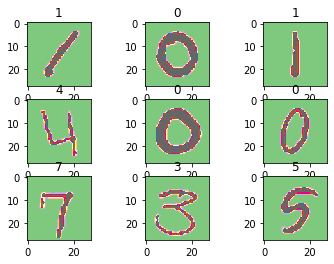

In [23]:
#Convert train datset to (num_images, img_rows, img_cols) format 
X_train = X_train.reshape(X_train.shape[0], 28, 28)

for i in range(0, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i],cmap=plt.get_cmap('Accent'))
    plt.title(y_train[i]);

#### Reshape the data to add a color 

In [24]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

#### Standartize the data

In [25]:
mean_px = np.mean(X_train).astype('float32')
std_px = np.std(X_train).astype('float32')

def standartize(x):
    return (x - mean_px)/std_px

##### One-hot encoding of labels

In [27]:
y_train = to_categorical(y_train)
y_train.shape

(42000, 10)

/root/anaconda3/envs/rpz/lib/python3.8/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


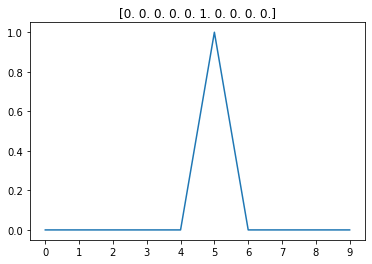

In [14]:
plt.plot(y_train[19])
plt.xticks(range(0,10))
plt.title(y_train[19])
plt.show()

#### Creating the Neural Network

In [28]:
np.random.seed(12)

In [29]:
model = Sequential()
model.add(Lambda(standartize,input_shape = (28,28,1)))
model.add(Flatten())
model.add(Dense(10,activation = 'softmax'))

In [30]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28, 1)
(None, 10)


##### Optimizing

In [31]:
model.compile(optimizer = RMSprop(lr = 0.001),loss = 'categorical_crossentropy',metrics = 'accuracy')

In [32]:
gen = image.ImageDataGenerator()

#### Cross-validation

In [33]:
y_train.shape

(42000, 10)

In [34]:
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,test_size=0.10, random_state=12)
batches = gen.flow(X_train,y_train,batch_size=64)
val_batches = gen.flow(X_val,y_val,batch_size=64)

## Still didn't use S